# Week 3 - Problem 1, Student College Acceptance Probability

This problem is taken from week 3 of the Coursera Machine Learning course by Andrew Ng. The in-class homework solution was originally performed in Octave. This workbook is my additional and alternative method of solving in Python.

Consider the following problem statement:
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

## Approach
Part 1) Build out a logistic regression solution using the vectorized arithmetic. 
Part 2) Use logistic regression classification models in scikit-learn as an alternative to compare our result

In [1]:
# Import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

## Part 1 - Manually construct logistic regression solution with gradient decent

Load and visualize the dataset.

In [2]:
pathToData = './ex2/ex2data1.txt'
data = pd.read_csv(pathToData,names=['Exam 1 Score','Exam 2 Score','Admit/Reject'])
data['Intercept'] = np.ones(len(data['Admit/Reject'].values))
data.describe()

,Exam 1 Score,Exam 2 Score,Admit/Reject,Intercept
count,100.000000,100.000000,100.000000,100.0
mean,65.644274,66.221998,0.600000,1.0
std,19.458222,18.582783,0.492366,0.0
min,30.058822,30.603263,0.000000,1.0
25%,50.919511,48.179205,0.000000,1.0
50%,67.032988,67.682381,1.000000,1.0
75%,80.212529,79.360605,1.000000,1.0
max,99.827858,98.869436,1.000000,1.0


In [3]:
# Define our feature, target, and parameter vectors
X = data[['Intercept','Exam 1 Score','Exam 2 Score']].values
y = data[['Admit/Reject']].values
theta = np.zeros((X.shape[1],1))

Text(0,0.5,'Exam 2 Score')

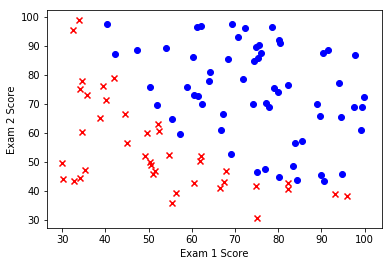

In [4]:
# Visualize the distribution using smart indexing
fig,ax = plt.subplots()
ax.scatter(data['Exam 1 Score'][data['Admit/Reject'] == 0],data['Exam 2 Score'][data['Admit/Reject'] == 0],color='r',marker='x',label='Reject')
ax.scatter(data['Exam 1 Score'][data['Admit/Reject'] == 1],data['Exam 2 Score'][data['Admit/Reject'] == 1],color='b',marker='o',label='Pass')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

### Define the sigmoid function, cost function, and gradient decent function

In [5]:
def sigmoid(z):
    '''
    Function evaluates the value of the sigmoid function
    '''
    return 1.0/(1.0+np.exp(-1.0*z))

In [6]:
def logisitc_cost_function(theta,X,y):
    '''
    Compute cost and gradient for logistic regression
    '''
    m = len(y)
    ## Evaluation of the vectorized form of the logisitic cost function
    term1 = -1*np.transpose(y)*np.log(sigmoid(np.matmul(np.transpose(theta),np.transpose(X))))
    term2 = -1*(1-np.transpose(y))*np.log(1-sigmoid(np.matmul(np.transpose(theta),np.transpose(X))))
    J = 1.0/(float(m))*np.sum(term1 + term2)
    
    ## Evaluation of the gradient vector
    grad = (1./float(m))*np.transpose(np.matmul(sigmoid(np.matmul(np.transpose(theta),np.transpose(X)))-np.transpose(y),X))
    
    return J, grad

In [7]:
def gradient_decent(theta,X,y,alpha,num_iter):
    '''
    Gradient decent method for updating theta
    '''
    cost_history = []
    m = float(len(y))
    
    for i in range(num_iter):
        cost,grad = logisitc_cost_function(theta,X,y)
        cost_history.append(cost)
        theta = theta - (alpha/m)*np.matmul(np.transpose(X),sigmoid(np.matmul(X,theta))-y) # vectorized form of the theta update equation
        
    return theta,cost_history

### Now that the sigmoid, logistic regression cost, and gradient decent functions are defined, lets give it a shot

/Users/chrisbenson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/chrisbenson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


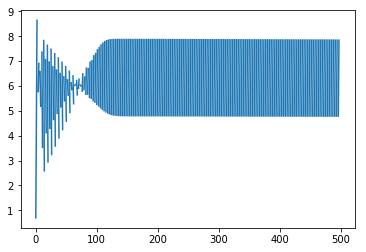

In [8]:
# Lets start with a learning rate, alpha, of 0.01
theta = np.zeros((X.shape[1],1))
alpha = 0.01
n_iterations = 500
result1 = gradient_decent(theta,X,y,alpha,n_iterations)
# Plot the cost function history over time
fig2,ax2 = plt.subplots()
ax2.plot(range(len(result1[1])),result1[1])

The result with a learning rate of 0.01 looks to be unstable. Let's try turning down the learning rate some.

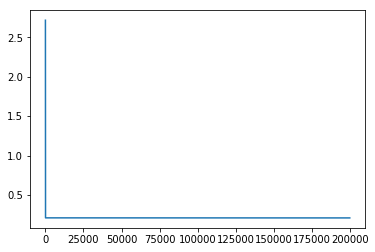

In [9]:
# Lets start with a learning rate, alpha, of 0.001, also I'm going to cheat a little and seed my starting values to help with convergence
theta = np.zeros((X.shape[1],1))
theta[0] = -20
theta[1] = 0.25
theta[2]= 0.25
alpha = 0.001
n_iterations = 200000
theta_out,cost_history = gradient_decent(theta,X,y,alpha,n_iterations)
# Plot the cost function history over time
fig2,ax2 = plt.subplots()
ax2.plot(range(len(cost_history)),cost_history)


### Cost as a function of iteration number looks much better. Let's see how well our fitted $\theta$ works on the data

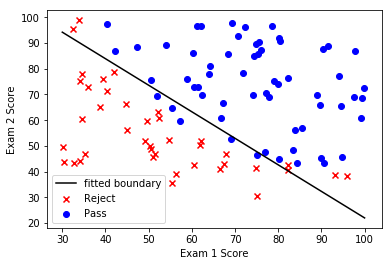

In [10]:
# Visualize the distribution using smart indexing
fig,ax = plt.subplots()
ax.scatter(data['Exam 1 Score'][data['Admit/Reject'] == 0],data['Exam 2 Score'][data['Admit/Reject'] == 0],color='r',marker='x',label='Reject')
ax.scatter(data['Exam 1 Score'][data['Admit/Reject'] == 1],data['Exam 2 Score'][data['Admit/Reject'] == 1],color='b',marker='o',label='Pass')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
x_score = np.linspace(30,100)
y_score = (theta_out[0]+x_score*theta_out[1])/(-1*theta_out[2])
ax.plot(x_score,y_score,label='fitted boundary',color='k')
ax.legend(loc=0)


## Part 2 - Use logistic regression model in scikit-learn

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
X_2 = X[:,1:] # drop the intercept vector
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_2,y)

/Users/chrisbenson/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


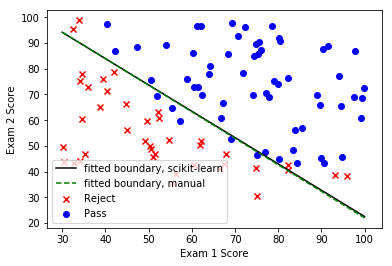

In [13]:
# Visualize the distribution using smart indexing
fig,ax = plt.subplots()
ax.scatter(data['Exam 1 Score'][data['Admit/Reject'] == 0],data['Exam 2 Score'][data['Admit/Reject'] == 0],color='r',marker='x',label='Reject')
ax.scatter(data['Exam 1 Score'][data['Admit/Reject'] == 1],data['Exam 2 Score'][data['Admit/Reject'] == 1],color='b',marker='o',label='Pass')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
x_score_2 = np.linspace(30,100)
y_score_2 = (clf.intercept_[0]+x_score_2*clf.coef_[0][0])/(-1*clf.coef_[0][1])
ax.plot(x_score_2,y_score_2,label='fitted boundary, scikit-learn',color='k')
ax.plot(x_score,y_score,label='fitted boundary, manual',color='g',linestyle='--')
ax.legend(loc=0)

# Discussion

The two logistic regression implementations produced very similar results, as seen on the plotted boundary. The scikit-learn method is, of course, much faster than my manual gradient decent method (in addition to some optimization that could be done on my parameters). This is to be expected with the sophisticated optimizers running in the background, but it is nice to see we get a similar result.

In the end, our logistic regression classifier draws a line which reasonable by eye and should produce a reasonable prediction rate, assuming out training data is a representative sample of the underlying true distribution. 